In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

FIGTEXT_STYLE = dict(ha='center', fontsize=10, color='gray') 
TEXT_STYLE = dict(size=11, color='gray')

In [13]:
data = pd.read_csv('../Cleaned_data/data_after_2000.csv')

In [192]:
data.head()

,Unnamed: 0,country_code,country_name,year,gdp_growth_rate,government_type,gdp_per_capita
0,5990,AGO,Angola,2000,3.054624,Dictatorship,2195.631044
1,5991,ALB,Albania,2000,6.950036,Democracy,2244.624632
2,5992,ARE,United Arab Emirates,2000,10.852704,Dictatorship,63251.522987
3,5993,ARG,Argentina,2000,-0.788999,Democracy,8224.112827
4,5994,ARM,Armenia,2000,5.900000,Democracy,1403.031257


In [14]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.tail()

,country_code,country_name,year,gdp_growth_rate,government_type,gdp_per_capita
3435,WSM,Samoa,2018,-2.168099,Dictatorship,3748.844075
3436,YEM,"Yemen, Rep.",2018,-2.701475,Dictatorship,632.909430
3437,ZAF,South Africa,2018,0.787056,Dictatorship,7433.615398
3438,ZMB,Zambia,2018,3.794901,Dictatorship,1678.169124
3439,ZWE,Zimbabwe,2018,6.159190,Dictatorship,1305.783295


In [6]:
data.shape

(3440, 6)

In [11]:
data.columns

Index(['country_code', 'country_name', 'year', 'gdp_growth_rate',
       'government_type', 'gdp_per_capita'],
      dtype='object')

# Which type of government performs better economically?

To answer this question I will divide the dataset into three parts.
 - year 2000 to year 2005
 - year 2006 to year 2011
 - year 2012 to year 2018

In [15]:
data_new = data[(data.year >= 2000) & (data.year <= 2005)]

data = data_new.copy()

## Analysis on first dataset.

In [16]:
# grouping by government_type (Democracy or Dictatorship)
grouped_gov_type = data.groupby('government_type')

# splitting the grouped data into democracy and dictatorship
dem = grouped_gov_type.get_group('Democracy')  # dem -> democracy
dic = grouped_gov_type.get_group('Dictatorship')  # dic -> dictatorship

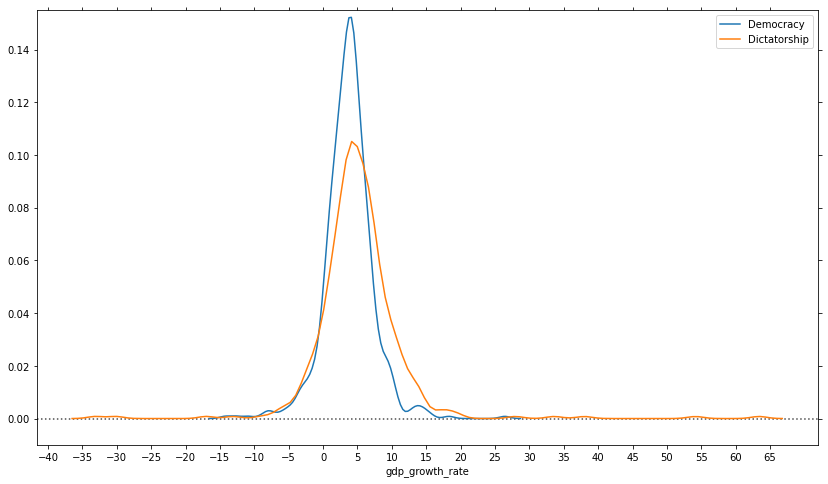

In [34]:
plt.figure(figsize=(14, 8))

plt.axhline(0, linestyle='dotted', color='k', alpha=0.7)
sns.distplot(dem.gdp_growth_rate, hist=False, label='Democracy')
sns.distplot(dic.gdp_growth_rate, hist=False, label='Dictatorship')

plt.xticks([i for i in range(-40, 70, 5)])
plt.ylim(-0.01, 0.155)

plt.tick_params(right=True, top=True)
plt.legend()
plt.show()

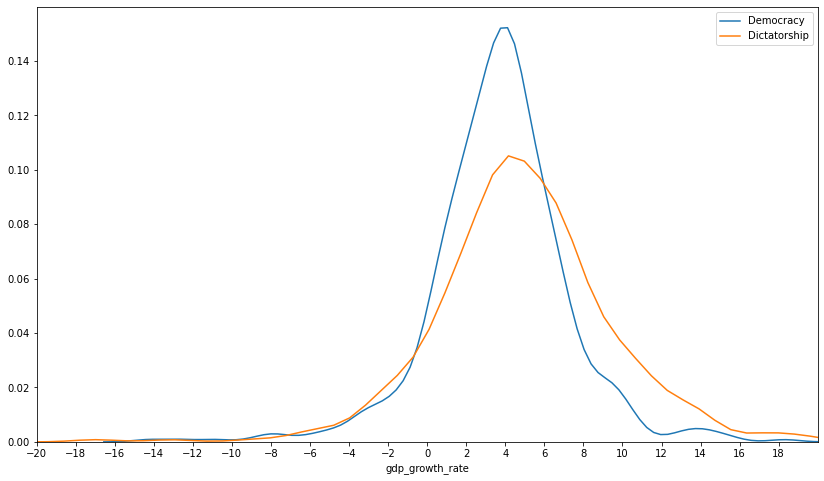

In [40]:
plt.figure(figsize=(14, 8))

sns.distplot(dem.gdp_growth_rate, hist=False, label='Democracy')
sns.distplot(dic.gdp_growth_rate, hist=False, label='Dictatorship')

plt.xlim(-8, 20)
plt.xticks([i for i in range(-20, 20, 2)])

plt.legend()
plt.show()

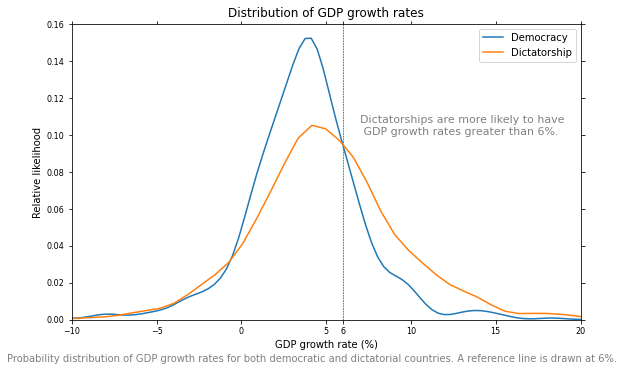

In [159]:
plt.figure(figsize=(8, 5))

plt.axvline(6, ls='dashed', color='k', lw=0.5)
sns.distplot(dem.gdp_growth_rate, hist=False, label='Democracy')
sns.distplot(dic.gdp_growth_rate, hist=False, label='Dictatorship')
plt.xlim(-10, 20)
plt.ylim(0, 0.16)

plt.tick_params(right=True, top=True)
plt.xlabel('GDP growth rate (%)')
plt.ylabel('Relative likelihood')

xt = [i for i in range(-10, 21, 5)]
xt.append(6)
plt.xticks(xt)


plt.title('Distribution of GDP growth rates', pad=7)
plt.legend()
plt.text(7, 0.10, 'Dictatorships are more likely to have\n GDP growth rates greater than 6%.', **TEXT_STYLE)
plt.figtext(0.5, -0.01, 
            'Probability distribution of GDP growth rates for both democratic and dictatorial countries. A reference line is drawn at 6%.',
           **FIGTEXT_STYLE)

plt.tight_layout()
#plt.savefig('pdf.png', dpi=150, bbox_inches = "tight")
plt.show()



In [31]:
dem.columns

Index(['country_code', 'country_name', 'year', 'gdp_growth_rate',
       'government_type', 'gdp_per_capita'],
      dtype='object')

In [137]:
dem.gdp_growth_rate[(dem.gdp_growth_rate >= 6)].size / dem.gdp_growth_rate.size

0.19745222929936307

In [138]:
dic.gdp_growth_rate[dic.gdp_growth_rate >= 6].size / dic.gdp_growth_rate.size

0.37777777777777777

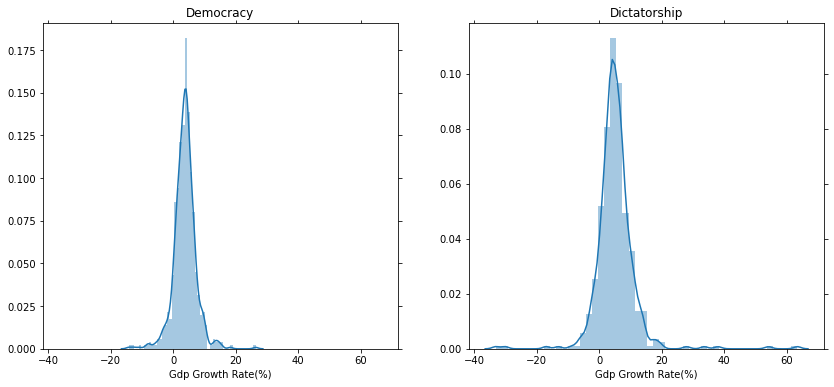

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14, 6), sharex=True)

sns.distplot(dem.gdp_growth_rate, ax=ax1)
ax1.tick_params(right=True, top=True)
ax1.set_xlabel('Gdp Growth Rate(%)')
ax1.set_title('Democracy')

sns.distplot(dic.gdp_growth_rate, ax=ax2)
ax2.tick_params(right=True, top=True)
ax2.set_xlabel('Gdp Growth Rate(%)')
ax2.set_title('Dictatorship')

plt.show()

In [21]:
dem.gdp_growth_rate.max(), dem.gdp_growth_rate.min()

(26.4173166001369, -14.2674830306195)

In [22]:
dic.gdp_growth_rate.max(), dic.gdp_growth_rate.min()

(63.37987542506021, -33.1008373826406)

The gdp growth rate for democratic countries has never gone below 15 and never above 27(approx.). The gdp growth for the dictatorship countries, on the other hand, has a much wider range - lowest values reaching less than -30 and the highest somewhere near 63.

In [17]:
def Cdf(data):
    '''
    Input:
    data : a pandas series
    
    Output:
    cdf : an ndarray containing cdf
    values :  an ndarray containing the sorted values
    '''
    unique_data = np.unique(data.values, return_counts=True)
    
    values = unique_data[0]
    counts = unique_data[1]
    
    pdf = (counts/sum(counts)) * 100
    
    cdf = np.cumsum(pdf)
    
    return cdf, values

In [18]:
def calculate_cdf():
    '''
    Calculates cdf of GDP growth rates for both democracy and dictatorship
    
    returns : cdf
    '''
    dem_cdf, dem_values = Cdf(dem.gdp_growth_rate)
    dic_cdf, dic_values = Cdf(dic.gdp_growth_rate)

    cdf = []
    cdf.append(dem_cdf)
    cdf.append(dic_cdf)

    values = []
    values.append(dem_values)
    values.append(dic_values)
    
    return cdf, values

In [19]:
cdf, values = calculate_cdf()

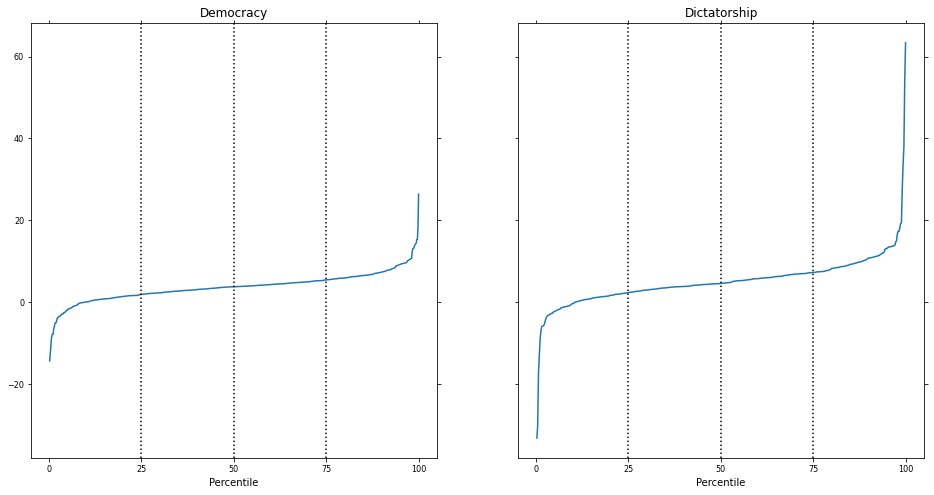

In [174]:
titles = ['Democracy', 'Dictatorship']

fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(16, 8), sharey=True)

for i in range(2):
    ax[i].plot(cdf[i], values[i])
    
    ax[i].set_xlabel('Percentile')
    ax[i].tick_params(right=True, top=True)
    ax[i].set_title(titles[i])

ax[0].set_xticks([0, 25, 50, 75, 100])

for i in [25, 50 ,75]:
    ax[0].axvline(i, linestyle='dotted', color='black')
    ax[1].axvline(i, linestyle='dotted', color='black')

plt.show()

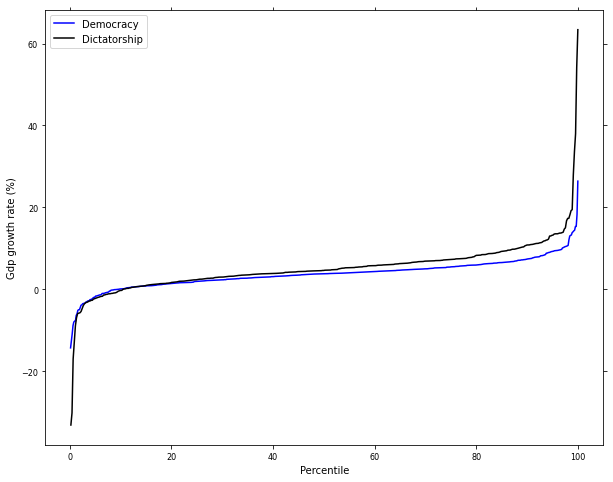

In [24]:
plt.figure(figsize=(10, 8))

plt.plot(cdf[0], values[0], color='b', label='Democracy')
plt.plot(cdf[1], values[1], color='k', label='Dictatorship')

plt.xlabel('Percentile')
plt.ylabel('Gdp growth rate (%)')
plt.tick_params(right=True, top=True)

plt.legend()
plt.show()

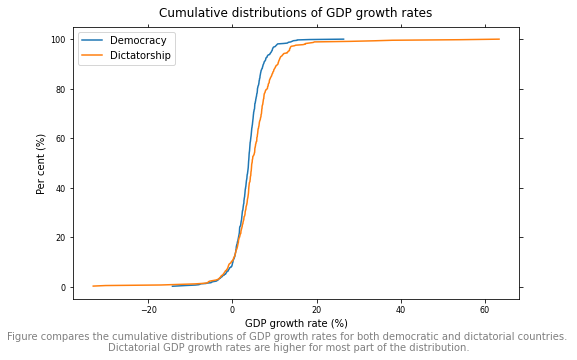

In [160]:
plt.figure(figsize=(8, 5))

plt.plot(dem_values, dem_cdf,label='Democracy')
plt.plot(dic_values, dic_cdf, label='Dictatorship')

plt.xlabel('GDP growth rate (%)')
plt.ylabel('Per cent (%)')
plt.tick_params(right=True, top=True)

plt.title('Cumulative distributions of GDP growth rates', pad=10)
plt.figtext(0.5, -0.02, 'Figure compares the cumulative distributions of GDP growth rates \
for both democratic and dictatorial countries. \nDictatorial GDP growth rates are higher for \
most part of the distribution.',
           **FIGTEXT_STYLE)

plt.legend()
#plt.savefig('comparing_cdf', dpi=150, bbox_inches = "tight")
plt.show()

In [168]:
np.percentile(dic.gdp_growth_rate, 14)

0.8084165268953056

In [169]:
np.percentile(dem.gdp_growth_rate, 14)

0.7794444031643427

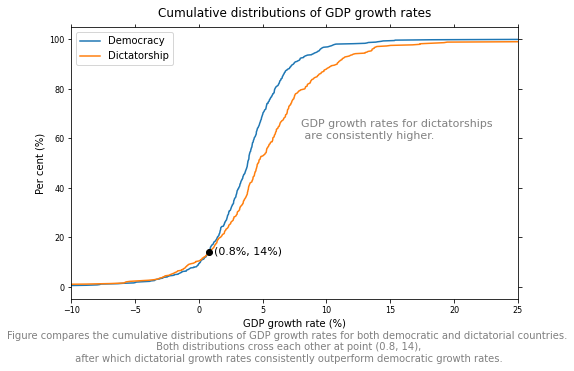

In [161]:
plt.figure(figsize=(8, 5))

plt.plot(dem_values, dem_cdf,label='Democracy')
plt.plot(dic_values, dic_cdf, label='Dictatorship')
plt.plot(0.8, 14, 'o',color='k')

plt.xlabel('GDP growth rate (%)')
plt.ylabel('Per cent (%)')
yticks = [i for i in range(0, 101, 20)]
plt.yticks(yticks)
plt.tick_params(right=True, top=True)
plt.xlim(-10, 25)

# marking the point
style = dict(size=11, color='black')
plt.text(1.2, 13, '(0.8%, 14%)', **style)
# text in the data region
style = dict(size=11, color='gray')
plt.text(8, 60, 'GDP growth rates for dictatorships\n are consistently higher.', **style)

plt.title('Cumulative distributions of GDP growth rates', pad=10)
plt.legend(loc='upper left')
plt.figtext(0.5, -0.05, 'Figure compares the cumulative distributions of GDP growth rates \
for both democratic and dictatorial countries.\n Both distributions cross each other at point \
(0.8, 14),\n after which dictatorial growth rates consistently outperform democratic growth rates.',
           ha='center', fontsize=10, color='gray')

#plt.savefig('comparing_cdf_zoomed', dpi=150, bbox_inches = "tight")
plt.show()

Both distributions are quite similar until the 14 percentile. After 14th percentile, dictatorship outperforms democracy consistently.

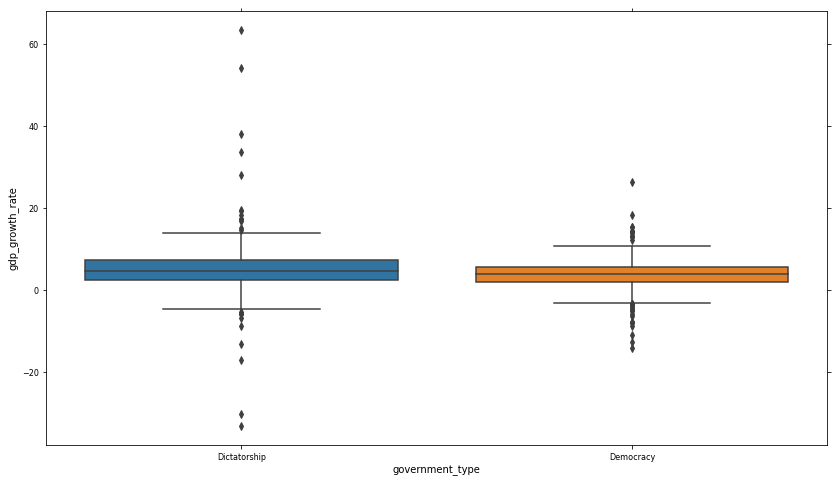

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='government_type', y='gdp_growth_rate', data=data)
plt.tick_params(right=True, top=True)
plt.show()

Also dictatorship seems unstable.

In [30]:
def median_diff(series1, series2):
    '''
    Returns the difference between the medians of the two series
    
    series1 : pandas series
    series2 : pandas series
    
    returns : the difference between the medians of the two series
    '''
    diff = series1.median() - series2.median()
    return diff

In [33]:
difference = median_diff(grouped_gov_type.get_group('Dictatorship').gdp_growth_rate, 
                         grouped_gov_type.get_group('Democracy').gdp_growth_rate)
print(difference)

0.8286805408347608


So, it seems like dictator-ruled countries, on average, have about 0.8% higher gdp growth rate.

In [20]:
def percentile_values(arr, ls):
    '''
    Input:
    arr: an ndarray
    ls: a python list of all the percentiles
    
    Output:
    Returns a list of corresponding values for the percentiles
    '''
    values = np.percentile(arr, ls)
    
    return values

In [26]:
ls = [i for i in range(25, 76)]
dem_percentile_values = percentile_values(values[0], ls)
dic_percentile_values = percentile_values(values[1], ls)

In [183]:
slope, intercept

(1.427384044405052, -0.4860785587255539)

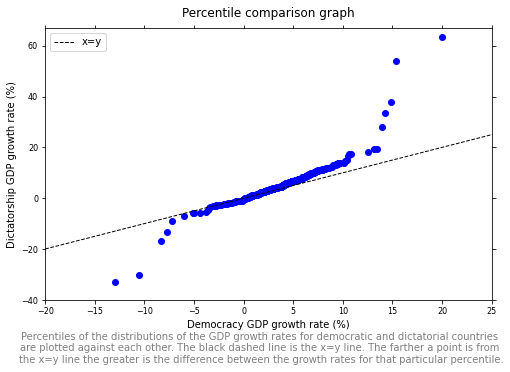

In [139]:
fig, ax = plt.subplots(figsize=(8, 5))
statsmodels.graphics.gofplots.qqplot_2samples(dic.gdp_growth_rate, dem.gdp_growth_rate, xlabel='Democracy',
                                              ylabel='Dictatorship', ax=ax)

lims = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
plt.plot(lims, lims, 'k--', label='x=y', lw=1)


ax.set_xlim(-20, 25)
ax.set_ylim(-40, 67)
plt.tick_params(right=True, top=True)

plt.xlabel('Democracy GDP growth rate (%)')
plt.ylabel('Dictatorship GDP growth rate (%)')


plt.title('Percentile comparison graph', pad=11)
plt.legend(loc='upper left')
plt.figtext(0.5, -0.05, 'Percentiles of the distributions of the GDP growth rates for democratic and dictatorial \
countries \nare plotted against each other. The black dashed line is the x=y line. The farther a point is from \n\
the x=y line the greater is the difference between the growth rates for that particular percentile.' , 
            ha='center', fontsize=10, color='gray')

plt.savefig('Percentile_comparison', dpi=150, bbox_inches = "tight")
plt.show()

The dictator-ruled countries seem to be winning. The difference between the two types increases with the increase in the growth rate.

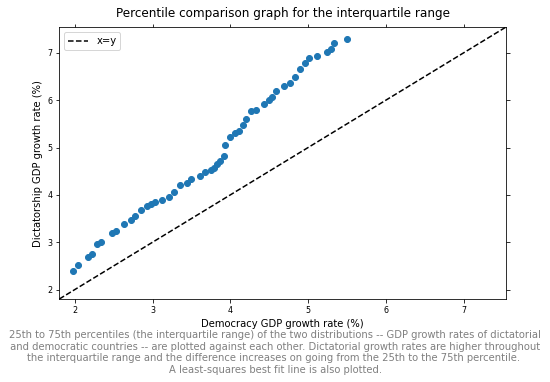

In [173]:
plt.figure(figsize=(8, 5))

plt.plot(dem_percentile_values, dic_percentile_values, 'o')
lims = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
plt.plot(lims, lims, 'k--', label='x=y')  # plotting x=y line

plt.xlabel('Democracy GDP growth rate (%)')
plt.ylabel('Dictatorship GDP growth rate (%)')
plt.title('Percentile comparison graph for the interquartile range', pad=10)

plt.xlim(lims)
plt.ylim(lims)
plt.tick_params(right=True, top=True)

plt.legend()
plt.figtext(0.5, -0.08, '25th to 75th percentiles (the interquartile range) of the two distributions -- GDP growth rates of dictatorial\n and democratic countries -- are plotted \
against each other. Dictatorial growth rates are higher throughout \nthe interquartile range and the difference increases \
on going from the 25th to the 75th percentile. \nA least-squares best fit line is also plotted.', ha='center', fontsize=10, color='gray')

plt.savefig('percentile_comparison_iqr', dpi=150, bbox_inches='tight')
plt.show()

In [28]:
slope, intercept = np.polyfit(dem_percentile_values, dic_percentile_values, deg=1)

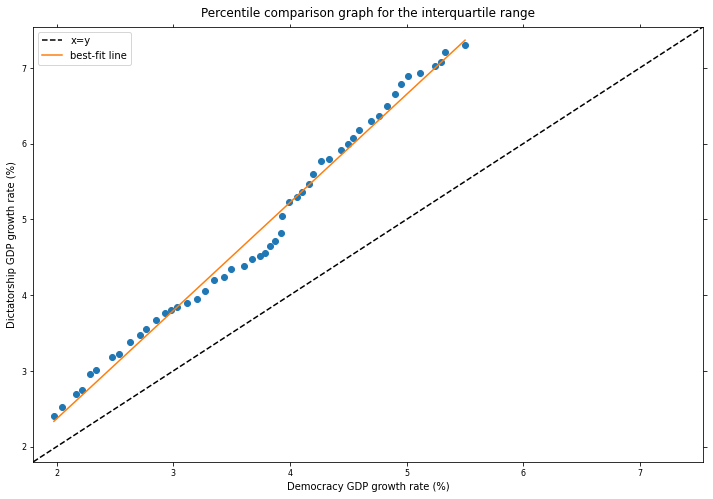

In [31]:
plt.figure(figsize=(12, 8))

plt.plot(dem_percentile_values, dic_percentile_values, 'o')
lims = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
plt.plot(lims, lims, 'k--', label='x=y')  # plotting x=y line
plt.plot(dem_percentile_values, slope*(dem_percentile_values) + intercept, label='best-fit line')

plt.xlabel('Democracy GDP growth rate (%)')
plt.ylabel('Dictatorship GDP growth rate (%)')
plt.title('Percentile comparison graph for the interquartile range', pad=10)

plt.xlim(lims)
plt.ylim(lims)
plt.tick_params(right=True, top=True)

plt.legend()
plt.show()

In [211]:
slope, intercept

(1.427384044405052, -0.4860785587255539)

In [36]:
x = dem_percentile_values + dic_percentile_values
y = dic_percentile_values - dem_percentile_values

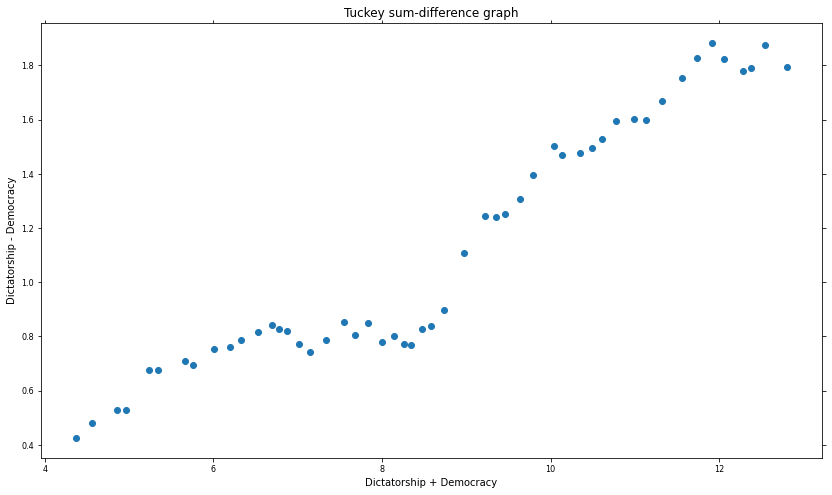

In [37]:
plt.figure(figsize=(14, 8))

plt.plot(x, y, 'o')

plt.xlabel('Dictatorship + Democracy')
plt.ylabel('Dictatorship - Democracy')

plt.tick_params(right=True, top=True)
plt.title('Tuckey sum-difference graph')
plt.show()

Time series

In [32]:
# grouping by year
grouped_dem_year = dem.groupby(by=['year'])
grouped_dic_year = dic.groupby(by=['year'])

dem_year_avg = grouped_dem_year.gdp_growth_rate.median().values

dic_year_avg = grouped_dic_year.gdp_growth_rate.median().values

In [33]:
years = [i for i in range(2000, 2006)]

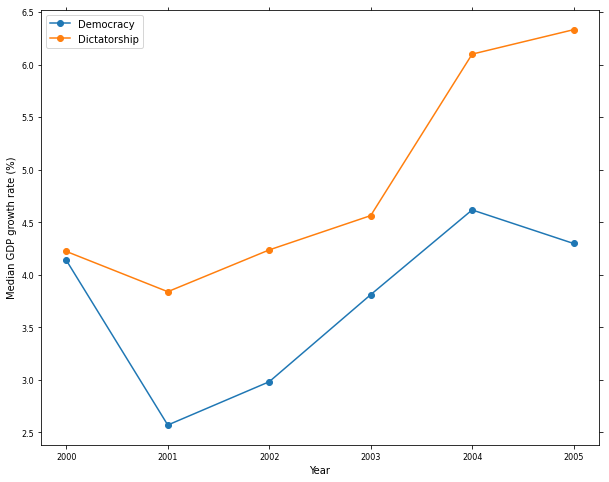

In [34]:
plt.figure(figsize=(10, 8))

plt.plot(years, dem_year_avg, 'o-', label='Democracy')
plt.plot(years, dic_year_avg, 'o-', label='Dictatorship')

plt.xlabel('Year')
plt.ylabel('Median GDP growth rate (%)')
plt.tick_params(right=True, top=True)

plt.legend()
plt.show()

## Controlling for income

Developing countries tend to have higher gdp growth rates as compared to developed countries. So, I will control for the income levels and do the analysis again and see if still there is a difference.

In [8]:
def income_classification(df):
    '''
    Classifies and divides the dataframe according to income levels.
    Classification is done according to GDP per capita
    
    df : dataframe
    
    returns : 4 dataframes. 1 for each income level.
    '''
        
    low_income_temp = df[df.gdp_per_capita <= 925]
    lower_middle_income_temp = df[(df.gdp_per_capita > 925) & (df.gdp_per_capita <= 3597)]
    upper_middle_income_temp = df[(df.gdp_per_capita > 3597) & (df.gdp_per_capita <= 11139)]
    high_income_temp = df[df.gdp_per_capita > 11139]

    low_income = low_income_temp.copy()
    lower_middle_income = lower_middle_income_temp.copy()
    upper_middle_income = upper_middle_income_temp.copy()
    high_income = high_income_temp.copy()

    return low_income, lower_middle_income, upper_middle_income, high_income

In [9]:
# classifying democracies according to income levels
income_classified_dem = income_classification(dem)

# classifying dictatorships according to income levels
income_classified_dic = income_classification(dic)

In [13]:
income_classified_dem[0].columns

Index(['country_code', 'country_name', 'year', 'gdp_growth_rate',
       'government_type', 'gdp_per_capita'],
      dtype='object')

In [16]:
income_levels = ['low_income', 'lower_middle_income', 'upper_middle_income', 'high_income']

In [47]:
def country_count():
    '''
    Prints the number of democratic and dictatorship countries for each income level.
    '''
    for i in range(4):
        print()
        print(income_levels[i])
        unique = np.unique(income_classified_dem[i].country_name)
        print('Democracy : ', unique.size)
        unique = np.unique(income_classified_dic[i].country_name)
        print('Dictatorship :', unique.size)

In [48]:
country_count()


low_income
Democracy :  14
Dictatorship : 27

lower_middle_income
Democracy :  33
Dictatorship : 34

upper_middle_income
Democracy :  33
Dictatorship : 21

high_income
Democracy :  42
Dictatorship : 9


Only 30% of the countries in the low-income group are democratic.

50% of the countries in the lower-middle-income group are democratic.

61% of the countries in the upper-middle-income group are democratic.

82% of the countries in the high-income group are democratic.

So, dictator countries dominate the lower-income group and democratic countries dominate the high-income group.

## Analysis after controlling for income.

Difference in median GDP growth rates for Dictatorship and Democracy

In [132]:
def income_classified_median_diff():
    '''
    Prints the difference between median GDP growth rate of dictatorship and democratic countries \
    for each income group.
    '''
    for i in range(4):
        print(income_levels[i], ' = ', end=' ')
        diff = median_diff(income_classified_dic[i].gdp_growth_rate,
                           income_classified_dem[i].gdp_growth_rate)
        print(diff)

In [133]:
income_classified_median_diff()  # median(dictatorship) - median(democracy)

low_income  =  1.2993912816250397
lower_middle_income  =  -0.06730150514481004
upper_middle_income  =  0.38602876287288
high_income  =  1.4780209439307899


In [177]:
def income_classified_cdf():
    dem_cdf = []
    dic_cdf = []
    
    for i in range(4):
        cdf, values = Cdf(income_classified_dem[i].gdp_growth_rate)
        dem_cdf.append((cdf, values))

        cdf, values = Cdf(income_classified_dic[i].gdp_growth_rate)
        dic_cdf.append((cdf, values))
    
    return dem_cdf, dic_cdf

In [178]:
dem_cdf, dic_cdf = income_classified_cdf()

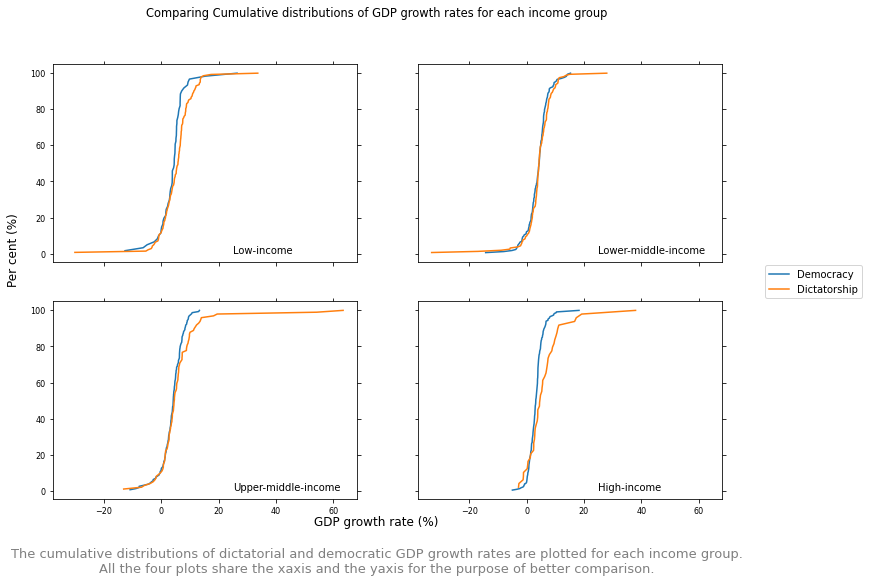

In [136]:
titles = ['Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

k = 0
for i in range(2):
    for j in range(2):
        ax[i][j].plot(dem_cdf[k][1], dem_cdf[k][0], label='Democracy')
        ax[i][j].plot(dic_cdf[k][1], dic_cdf[k][0], label='Dictatorship')
        ax[i][j].tick_params(right=True, top=True)
        ax[i][j].text(25, 0, titles[k], fontsize=10)
        k += 1
        
plt.figtext(0.08, 0.5, 'Per cent (%)', ha='center', rotation=90, fontsize=12)
plt.figtext(0.5, 0.08, 'GDP growth rate (%)', ha='center', fontsize=12)
plt.figtext(0.5, -0.003, 'The cumulative distributions of dictatorial and democratic GDP growth rates are plotted for each income group.\n\
All the four plots share the xaxis and the yaxis for the purpose of better comparison.', 
           **FIGTEXT_STYLE)

fig.suptitle('Comparing Cumulative distributions of GDP growth rates for each income group', fontsize=11.5)

plt.legend(bbox_to_anchor=[1.3, 1.1], loc='center')
#plt.savefig('cdf_classified', dpi=150, bbox_inches='tight')fsa
plt.show()

In [176]:
dem_cdf[1]

0.3184713375796179

In [181]:
ls = [i for i in range(25, 76)]
dem_percentile_values = []
dic_percentile_values = []

for i in range(4):
    dem_percentiles = percentile_values(dem_cdf[i][1] ,ls)
    dem_percentile_values.append(dem_percentiles)
    
    dic_percentiles = percentile_values(dic_cdf[i][1], ls)
    dic_percentile_values.append(dic_percentiles)

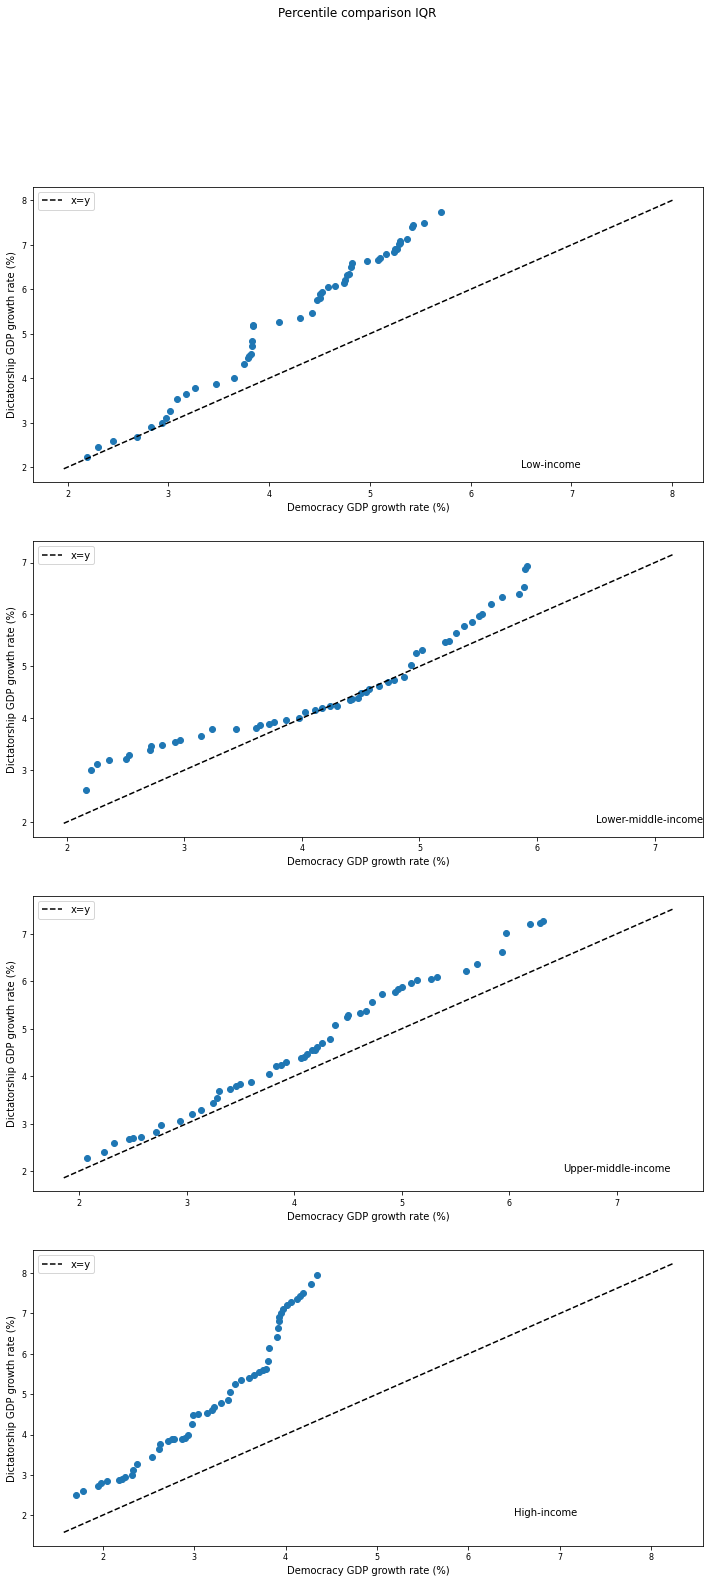

In [201]:
income_levels = ['Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income']
fig, ax = plt.subplots(nrows=4, figsize=(12, 25))

for i in range(4):
    ax[i].plot(dem_percentile_values[i], dic_percentile_values[i], 'o')
    lims = [np.min([ax[i].get_xlim(), ax[i].get_ylim()]), np.max([ax[i].get_xlim(), ax[i].get_ylim()])]
    ax[i].plot(lims, lims, 'k--', label='x=y')  # plotting x=y line
    ax[i].set_xlabel('Democracy GDP growth rate (%)')
    ax[i].set_ylabel('Dictatorship GDP growth rate (%)')
    ax[i].legend()
    ax[i].text(6.5, 2, income_levels[i], fontsize=10)

plt.suptitle('Percentile comparison IQR')
plt.show()

Dictatorship always has longer tails at both the ends for all the groups except for high-income; democracy has longer tail at the lower end in the higher-income group. The distributions, for the most part, follow each other very closely in the upper-middle and lower-middle groups. The difference between the two distributions is the highest in the high-income group, where dictatorship surpasses democracy at around 30th percentile and then the difference only increases.

In the high income group dictatorship really leaves democracy behind, especially as we move up the percentiles. 
Lower-middle-income group is a mixed bag. Initially, dictatorship has better values, but democracy takes over some where around 42nd percentile before dictatorship again takes the lead near the 55th percentile.

HYPOTHESIS :- Dictatorships grow faster than democracies, on average. Dictatorship grows faster than democracy in all the income groups. With the difference being highest in the high-income group and lowest in the lower-middle income group. 